Sales Product Data Analysis

In [385]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

Load CSV files into DataFrame

In [386]:
# import data 
folder = r'C:\Users\jakub\Documents\Python Data Analysis Projects\Sales Product Data'
files = os.listdir(folder)

li = []

for file in files:
    file_path = os.path.join(folder,file)
    data = pd.read_csv(file_path, delimiter=',', header=0)
    li.append(data)

df = pd.concat(li, axis=0, ignore_index=True)    

Data Description

In [387]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [388]:
df.shape

(186850, 6)

In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [390]:
# describe dataset
df.describe(include='all').transpose()

,count,unique,top,freq
Order ID,186305,178438,Order ID,355
Product,186305,20,USB-C Charging Cable,21903
Quantity Ordered,186305,10,1,168552
Price Each,186305,24,11.95,21903
Order Date,186305,142396,Order Date,355
Purchase Address,186305,140788,Purchase Address,355


Data Cleaning

In [1]:
# rename columns and replace spaces in column names
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
# remove rows, where is header from concatenated csv files
df = df[df.quantity_ordered != 'Quantity Ordered']

df.info()

NameError: name 'df' is not defined

In [392]:
# replace blank, single space or single hyphen with NaN value
df.replace(['', ' ', '-'], np.nan, inplace=True)
df.isnull().sum()

order_id            545
product             545
quantity_ordered    545
price_each          545
order_date          545
purchase_address    545
dtype: int64

In [393]:
df.shape

(186495, 6)

In [394]:
# remove rows where order_id is null
df = df[df.order_id.notnull()]
df.order_id.count()

185950

In [395]:
# change column datatype
df.quantity_ordered = df.quantity_ordered.astype(float)
df.price_each = df.price_each.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          185950 non-null  object 
 1   product           185950 non-null  object 
 2   quantity_ordered  185950 non-null  float64
 3   price_each        185950 non-null  float64
 4   order_date        185950 non-null  object 
 5   purchase_address  185950 non-null  object 
dtypes: float64(2), object(4)
memory usage: 9.9+ MB


In [396]:
# convert order_date column to datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
# create month, year and time column from order_date
df['order_year'] = pd.DatetimeIndex(df.order_date).year
df['order_month'] = pd.DatetimeIndex(df.order_date).month
df['order_hour'] = pd.DatetimeIndex(df.order_date).hour
df['order_day'] = pd.DatetimeIndex(df.order_date).day_of_week
df['order_day_name'] = pd.DatetimeIndex(df.order_date).day_of_week.map(
    {
        0: 'Monday',
        1: 'Tuesday',
        2: 'Wednesday',
        3: 'Thursday',
        4: 'Friday',
        5: 'Saturday',
        6: 'Sunday'
    }
)

# Map month number to Month name

df['order_month_name'] = df.order_month.map(
    {
        1:'January',
        2:'February',
        3:'March',
        4:'April',
        5:'May',
        6:'June',
        7:'July',
        8:'August',
        9:'September',
        10:'October',
        11:'November',
        12:'December'}
    )

df.head()




,order_id,product,quantity_ordered,price_each,order_date,purchase_address,order_year,order_month,order_hour,order_day,order_day_name,order_month_name
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,8,4,Friday,April
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,22,6,Sunday,April
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,4,Friday,April
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,4,Friday,April
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,9,1,Tuesday,April


In [397]:
# add total_price column
df['total_price'] = df.quantity_ordered * df.price_each
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,order_year,order_month,order_hour,order_day,order_day_name,order_month_name,total_price
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,8,4,Friday,April,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,22,6,Sunday,April,99.99
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,4,Friday,April,600.00
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,4,Friday,April,11.99
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,9,1,Tuesday,April,11.99


In [398]:
# split purchase address to street, city and zip code
df[['street', 'city', 'zipcode']] = df['purchase_address'].str.split(', ', expand=True)
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,order_year,order_month,order_hour,order_day,order_day_name,order_month_name,total_price,street,city,zipcode
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,8,4,Friday,April,23.90,917 1st St,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,22,6,Sunday,April,99.99,682 Chestnut St,Boston,MA 02215
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,4,Friday,April,600.00,669 Spruce St,Los Angeles,CA 90001
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,4,Friday,April,11.99,669 Spruce St,Los Angeles,CA 90001
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,9,1,Tuesday,April,11.99,333 8th St,Los Angeles,CA 90001


Exploratory Data Analysis

In [399]:
# top 10 selling products
df.groupby('product')['product'].count()\
    .reset_index(name='count')\
    .sort_values(['count'], ascending=False)\
    .head(10)

,product,count
15,USB-C Charging Cable,21903
12,Lightning Charging Cable,21658
5,AAA Batteries (4-pack),20641
4,AA Batteries (4-pack),20577
17,Wired Headphones,18882
6,Apple Airpods Headphones,15549
7,Bose SoundSport Headphones,13325
2,27in FHD Monitor,7507
18,iPhone,6842
1,27in 4K Gaming Monitor,6230


<Figure size 3600x7200 with 0 Axes>

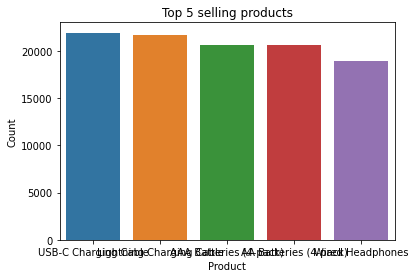

<Figure size 3600x7200 with 0 Axes>

In [400]:
# create chart for top 5 selling products over the years
data = df.groupby('product')['product'].count()\
    .reset_index(name='count')\
    .sort_values(['count'], ascending=False)\
    .head(5)
sns.barplot(data=data, x='product', y='count')
plt.title('Top 5 selling products')
plt.ylabel('Count')
plt.xlabel('Product')
plt.figure(figsize=(50,100))



In [401]:
# top products by sales
df.groupby('product')['total_price'].sum()\
    .reset_index(name='Total Sales')\
    .sort_values(['Total Sales'], ascending=False)

,product,Total Sales
13,Macbook Pro Laptop,8037600.00
18,iPhone,4794300.00
14,ThinkPad Laptop,4129958.70
9,Google Phone,3319200.00
1,27in 4K Gaming Monitor,2435097.56
3,34in Ultrawide Monitor,2355558.01
6,Apple Airpods Headphones,2349150.00
8,Flatscreen TV,1445700.00
7,Bose SoundSport Headphones,1345565.43
2,27in FHD Monitor,1132424.50


Text(0.5, 1.0, 'Top 5 products by total sales')

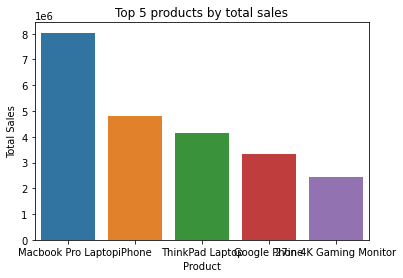

In [402]:
data = df.groupby('product')['total_price'].sum()\
    .reset_index(name='Total Sales')\
    .sort_values(['Total Sales'], ascending=False)

sns.barplot(data=data.head(5), x='product', y='Total Sales')
plt.xlabel('Product')
plt.title('Top 5 products by total sales')

In [403]:
# sales in months
data = df.groupby(['order_month_name', 'order_month'])['total_price'].sum()\
    .reset_index(name='Total Sales')\
    .sort_values(['order_month'], ascending=True)
data

,order_month_name,order_month,Total Sales
4,January,1,1822256.73
3,February,2,2202022.42
7,March,3,2807100.38
0,April,4,3390670.24
8,May,5,3152606.75
6,June,6,2577802.26
5,July,7,2647775.76
1,August,8,2244467.88
11,September,9,2097560.13
10,October,10,3736726.88


Text(0, 0.5, 'Total Sales (Mil. $)')

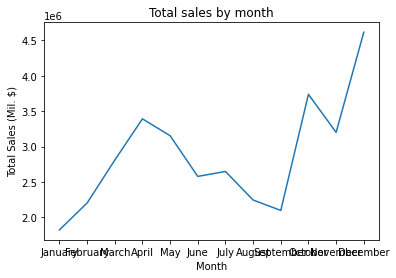

In [404]:
sns.lineplot(data=data, x='order_month_name', y='Total Sales')
plt.title('Total sales by month')
plt.xlabel('Month')
plt.ylabel('Total Sales (Mil. $)')

In [405]:
# sales in city
data = df.groupby('city')['total_price'].sum()\
    .reset_index(name='total_sales')\
    .sort_values('total_sales', ascending=False)
data

,city,total_sales
7,San Francisco,8262203.91
4,Los Angeles,5452570.80
5,New York City,4664317.43
2,Boston,3661642.01
0,Atlanta,2795498.58
3,Dallas,2767975.40
8,Seattle,2747755.48
6,Portland,2320490.61
1,Austin,1819581.75


Text(0.5, 0, 'City')

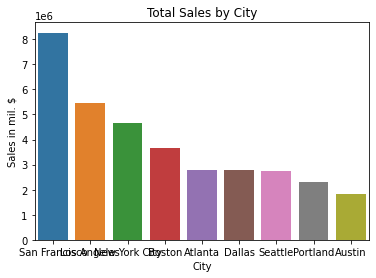

In [406]:
sns.barplot(data=data, x='city', y='total_sales')
plt.title('Total Sales by City')
plt.ylabel('Sales in mil. $')
plt.xlabel('City')

Text(0.5, 1.0, 'Total sold products by city')

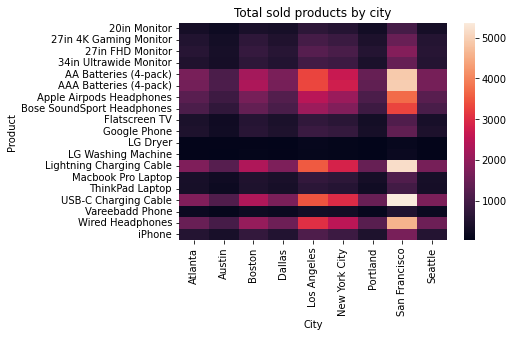

In [407]:
# sales by city and product
data = df[['city', 'product', 'total_price']]
data = data.groupby(['city', 'product'])['total_price'].count()\
    .reset_index(name='sold')\
    .sort_values('sold', ascending=False)
data = data.pivot('city', 'product', 'sold').transpose()
sns.heatmap(data=data)
plt.xlabel('City')
plt.ylabel('Product')
plt.title('Total sold products by city')

<AxesSubplot:>

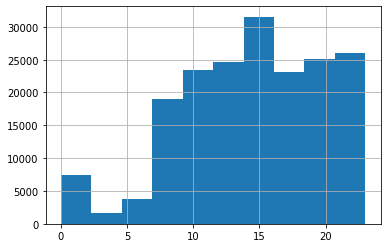

In [408]:
# Total sold products in hour of day
df.order_hour.hist()

In [421]:
# Total sold products in day of the week
data = df[['order_day', 'order_day_name', 'order_id']]
data = data.groupby(['order_day', 'order_day_name'])['order_id'].count()\
    .reset_index(name='sold')\
    .sort_values('order_day', ascending=True)
data

,order_day,order_day_name,sold
0,0,Monday,26547
1,1,Tuesday,27175
2,2,Wednesday,26477
3,3,Thursday,26461
4,4,Friday,26247
5,5,Saturday,26492
6,6,Sunday,26551


<AxesSubplot:xlabel='order_day_name', ylabel='sold'>

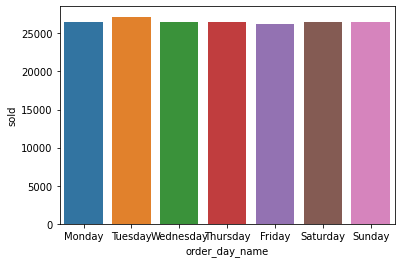

In [422]:
sns.barplot(data=data, x='order_day_name', y='sold')

In [410]:
# correlation matrix
df.corr()

,quantity_ordered,price_each,order_year,order_month,order_hour,order_day,total_price
quantity_ordered,1.000000,-0.148272,0.002489,0.000791,-0.002218,-0.005114,-0.139417
price_each,-0.148272,1.000000,0.002670,-0.003375,0.001721,-0.000451,0.999203
order_year,0.002489,0.002670,1.000000,-0.023391,-0.032126,-0.006697,0.002824
order_month,0.000791,-0.003375,-0.023391,1.000000,0.001731,-0.006077,-0.003466
order_hour,-0.002218,0.001721,-0.032126,0.001731,1.000000,0.004984,0.001668
order_day,-0.005114,-0.000451,-0.006697,-0.006077,0.004984,1.000000,-0.000482
total_price,-0.139417,0.999203,0.002824,-0.003466,0.001668,-0.000482,1.000000


<AxesSubplot:>

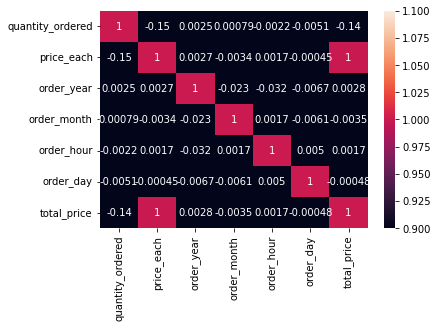

In [411]:
# correlation heatmap
sns.heatmap(df.corr(), vmin=1, vmax=1 ,annot=True)

# On heatmap we can see, that there is no correlation between variables. 
# There is only correlation between total price, quantity_ordered and price_each but total_price is calculated variable from these two.